In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [17]:
ra_in=float(input('enter RA f object in degrees'))
dec_in=float(input('enter DEC f object in degrees'))
#a_fov=float(input('enter the apparent field of view in degrees'))
#f_eyep=float(input('enter the focal length of eye piece'))
#f_obj=float(input('enter the focal length of  objective'))
#D=float(input('enter diameter of telescope in mm'))

#fov=float(a_fov/(f_obj/f_eyep)) #true field of view
#m_lim=2+5*np.log10(D)
fov=float(input('enter true fov in degrees'))
m_lim=float(input('enter lim mag'))
x=int(m_lim/6)

enter RA f object in degrees45
enter DEC f object in degrees-45
enter true fov in degrees12
enter lim mag12


In [27]:
#function for showing the stereographic ptojection.

def ster_plot(fov):
    
    fig = plt.figure(figsize=(30,30))
    ax1= fig.add_subplot(1,2,1)
    ax1.set_facecolor('k')
    
    # to prevent error occuring while zooming in at the poles
    if (dec_in+fov/2<90 and dec_in-fov/2>-90):
         m = Basemap(projection = "stere",
            llcrnrlon=ra_in-fov/2,llcrnrlat=dec_in-fov/2,
            urcrnrlon=ra_in+fov/2,urcrnrlat=dec_in+fov/2,
            resolution = "i",lat_0=dec_in,lon_0=ra_in)
   
    else:
        m = Basemap(width=8000000,height=8000000,projection = "stere",
            lat_0=dec_in,lon_0=ra_in,resolution = "i")
    
    plt.title('field of view through eyepiece '
              ,pad=30,size=20)
    m.drawmapboundary(color='white',linewidth=1.5,fill_color='k')
    x1,y1=m(ra_1,dec_1) # coordinates of the projection
    m.scatter(x1,y1,s=300,color='white')
    
    x2,y2=m(ra_2,dec_2)
    m.scatter(x2,y2,s=1,color='white')
    
    x3,y3=m(ra_3,dec_3)
    m.scatter(x3,y3,s=2,color='white')
    
    x4,y4=m(ra_4,dec_4)
    m.scatter(x4,y4,s=4,color='white')
    
    x5,y5=m(ra_5,dec_5)
    m.scatter(x5,y5,s=5,color='white')
    
    x6,y6=m(ra_6,dec_6)
    m.scatter(x6,y6,s=40,color='white',label='stars')
    
    x7,y7=m(ra_7,dec_7)
    m.scatter(x7,y7,s=60,color='white')
    
    xm,ym=m(ra_m,dec_m)
    m.scatter(xm,ym,s=100,color='yellow',marker='^',label='messier objects')
    
    xcb,ycb=m(ra_cb,dec_cb)
    m.scatter(xcb,ycb,s=20,color='g',marker='_',label='constellation borders')
    
    m.drawparallels(range(-90,90,10),color='white',labels=[1,1,0,0],dashes=[1,1])
    m.drawmeridians(range(0,360,10),color='white',labels=[0,0,1,1],dashes=[1,1])
    
   
    plt.legend(loc=8,shadow=True,ncol=3,fontsize=15,facecolor='grey')
    plt.show()

In [28]:
# function for plotting the hops given array of logitude and latitude of hops
def hop(lon,lat):

    fig = plt.figure(figsize=(30,30))
    ax2=fig.add_subplot(1,2,2)

    
    m = Basemap(width=8000000,height=8000000,projection = "stere",
            lat_0=dec_in,lon_0=ra_in,resolution = "i")
    
    plt.title('Hops',pad=30,size=20)
    m.drawmapboundary(color='white',linewidth=1.5,fill_color='k')
    x1,y1=m(ra_1,dec_1) # converting to coordinates of the projection
    m.scatter(x1,y1,s=300,color='white')
    
    #x2,y2=m(ra_2,dec_2)
    #m.scatter(x2,y2,s=1,color='k')
    
    #x3,y3=m(ra_3,dec_3)
    #m.scatter(x3,y3,s=2,color='k')
    
    #x4,y4=m(ra_4,dec_4)
    #m.scatter(x4,y4,s=4,color='k')
    
    x5,y5=m(ra_5,dec_5)
    m.scatter(x5,y5,s=5,color='white')
    
    x6,y6=m(ra_6,dec_6)
    m.scatter(x6,y6,s=40,color='white',label='stars')
    
    x7,y7=m(ra_7,dec_7)
    m.scatter(x7,y7,s=60,color='white')
    
    xm,ym=m(ra_m,dec_m)
    m.scatter(xm,ym,s=150,color='yellow',marker='^',label='messier objects')
    
    xcb,ycb=m(ra_cb,dec_cb)
    m.scatter(xcb,ycb,s=20,color='g',marker='_',label='constellation boundaries')
    
    m.drawparallels(range(-90,90,10),color='white',labels=[1,1,0,0])
    m.drawmeridians(range(0,360,10),color='white',labels=[0,0,1,1])
    
    #adding star hops 
    for i in range(1,len(lon)):
        m.drawgreatcircle(lon[i-1],lat[i-1],
        lon[i],lat[i],color='m',linewidth=1.9)
    lon,lat=m(lon,lat)
    m.scatter(lon,lat,color='m',s=20,marker='o')
    
    plt.legend(loc=8,shadow=True,ncol=3,fontsize=15,facecolor='grey')
    plt.show()

In [29]:
#constellation borders
data_cb=pd.read_csv(r'F:\Python 3.7\constellation_borders.csv')
dec_cb=np.array(data_cb['DEJ2000'])
ra_cb=np.array(data_cb['RAJ2000'])

#messier objects
data_m=pd.read_csv(r'F:\Python 3.7\messier_objects.csv')
ra_m =np.array( data_m['RA_d_A_ICRS_J2017_5_2000'])
dec_m =np.array (data_m['DEC_d_D_ICRS_J2017_5_2000'])
messier_name=data_m['MAIN_ID']

#star dataa
file=pd.read_csv(r'F:\Python 3.7\hygdata_v3.csv')
data=file[file.columns[file.columns.isin (['id','ra','dec','mag'])]]
data['ra']=data['ra']*15 

# sorting the data into groups based their mag so that each class can be plotted with different size
data_1=data[(data['mag'] <= m_lim-6*x)] # will be the brightest stars
ra_1=np.array(data_1['ra'])
dec_1=np.array(data_1['dec'])

data_2=data[(data['mag'] <=m_lim) & (data['mag'] > m_lim-x)]#least brightest stars
ra_2=np.array(data_2['ra'])
dec_2=np.array(data_2['dec'])

data_3=data[(data['mag'] <=m_lim-x) & (data['mag'] > m_lim-2*x)]
ra_3=np.array(data_3['ra'])
dec_3=np.array(data_3['dec'])

data_4=data[(data['mag'] <= m_lim-2*x) & (data['mag'] > m_lim-3*x)]
ra_4=np.array(data_4['ra'])
dec_4=np.array(data_4['dec'])

data_5=data[(data['mag'] <=m_lim-3*x)  & (data['mag'] > m_lim-4*x)]
ra_5=np.array(data_5['ra'])
dec_5=np.array(data_5['dec'])

data_6=data[(data['mag'] <=m_lim-4*x)  & (data['mag'] > m_lim-5*x)]
ra_6=np.array(data_6['ra'])
dec_6=np.array(data_6['dec'])

data_7=data[(data['mag'] <=m_lim-5*x)  & (data['mag'] > m_lim-6*x)]
ra_7=np.array(data_7['ra'])
dec_7=np.array(data_7['dec'])

F:\Conda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


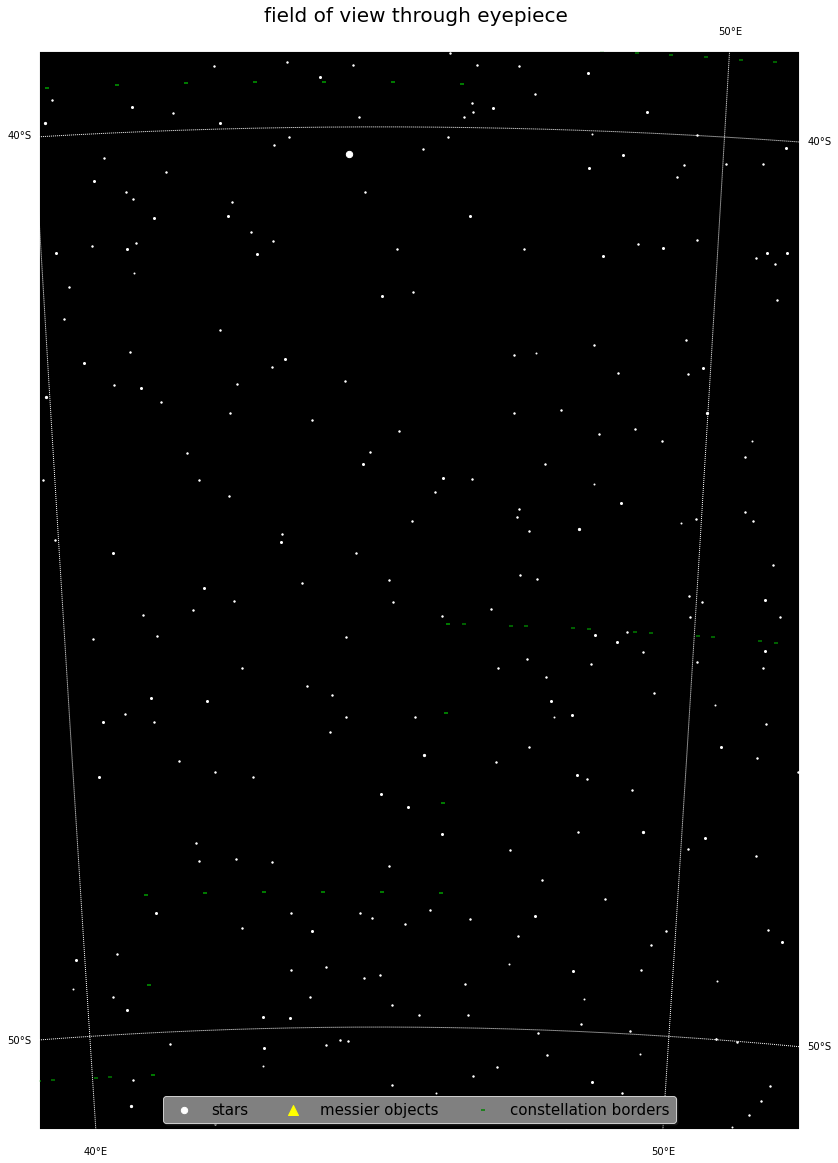

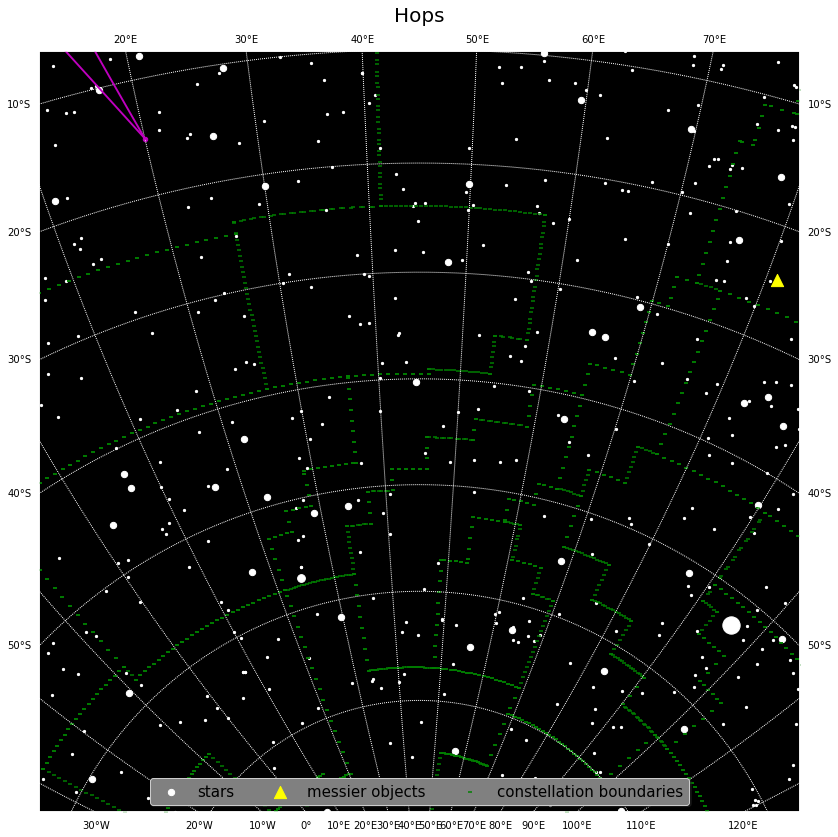

In [30]:

ster_plot(fov)

Lon=[0,10,20,15,-10]
Lat=[20,18,-15,-6,24]
hop(Lon,Lat)